## # Installing the libraries and using Pandas to create the final database

In [ ]:
!pip install -U spacy

In [ ]:
!python -m spacy download pt_core_news_sm # Downloading the model in Portuguese

2023-08-18 16:11:10.918973: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-18 16:11:13.657762: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 45.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

tabela1 = pd.read_csv('Reclamacoes_Avenue.csv')
tabela2 = pd.read_csv('Textos_completos.csv')

In [ ]:
# Setting the maximum number of rows to be displayed
pd.options.display.max_rows = None

# Replacing the empty NaN values of status in the spreadsheet
tabela1.fillna('Respondida', inplace=True)

In [ ]:
# Merging the two tables using the 'Title' column as the key
merged = pd.merge(tabela1, tabela2, on='Título')

# Replaces the contents of the 'Content' and 'Date' columns of table1 with the corresponding content from table2
merged['Conteúdo_Comentário'] = merged['Conteúdo_Comentário_y']
merged['Data_Comentário'] = merged['Data_Comentário_y']

# Removes the '_x' and '_y' columns that were created during the merge
merged = merged.drop(['Conteúdo_Comentário_x', 'Data_Comentário_x', 'Conteúdo_Comentário_y', 'Data_Comentário_y'], axis=1)

In [ ]:
tabela_final = merged.drop_duplicates(subset=['Conteúdo_Comentário'], keep="first")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tabela_final.to_csv('/content/drive/My Drive/tabela_final.csv', index=False) # Saving the spreadsheet in my files

## # Starting to use the Spacy library for Natural Language Processing

In [ ]:
tabela_final = pd.read_csv('tabela_final.csv')

In [ ]:
import spacy
import re

nlp = spacy.load('pt_core_news_sm')

textos = tabela_final['Título'].tolist() + tabela_final['Conteúdo_Comentário'].tolist()

docs = list(nlp.pipe(textos))

for doc in docs:
    for sent in doc.sents:
        print(sent.text)

Conta Hackeada não ha contato de emergencia
Erro de retirada
Cobrança indevida de corretagem
Cobrança indevida de corretagem
Transferência de Corretora
Impossível sacar Bitcoins
Cobrança de taxa sem aviso
Não consigo alterar senha
Minhas cotas VNQ sumiram da conta
Não consigo alterar meu número de celular cadastrado
A Avenue calculou o meu Imposto errado!!
!
Encerrar Conta
Não consigo tirar meu dinheiro
Imposto de renda
Conta com saldo negativo.
Cobrança indevida
Cobrança indevida
Cobrança indevida
Cobrança indevida
Conta Aberta no Registrato
Sem Ter Cadastrado
Não reconheço abertura de conta
Transferência de custódia
Péssimo suporte ao cliente
Registro de conta no Banco Central
Impossível liquidar posição BPYPM
Não recebi o comprovante da suposta comunicação que não recebi
cancelamento de conta
Nao consigo acessar minha conta pois preciso mudar o numero de telefone.
CANCELAMENTO DE CONTA
CANCELAMENTO DE CONTA
Bloquearam a minha conta com mais de 100 mil DÓLARES
Fomos [Editado pelo Rec

In [ ]:
# List of words I want to extract
verbos = []
adjetivos = []
substantivos = []
substantivos_próprios = []
pronomes = []
advérbios = []
interjeições = []
números = []
datas = []
símbolos = []

# List of parts of speech I want to exclude: determiners, prepositions, conjunctions
exclusao = ["DET", "ADP", "CCONJ"]

for doc in docs:
    for token in doc:
        if token.pos_ == 'VERB':
            verbos.append(token.lemma_)
        elif token.pos_ == 'ADJ':
            adjetivos.append(token.lemma_)
        elif token.pos_ == 'NOUN':
            if token.ent_type_ == "PROPN":
                substantivos_próprios.append(token.lemma_)
            else:
                substantivos.append(token.lemma_)
        elif token.pos_ == 'PRON':
            pronomes.append(token.lemma_)
        elif token.pos_ == 'ADV':
            advérbios.append(token.lemma_)
        elif token.pos_ == 'INTJ':
            interjeições.append(token.lemma_)
        elif token.pos_ == 'NUM':
            if '/' in token.text:
                datas.append(token.text)
            else:
                números.append(re.sub('[\"\']', '', token.lemma_)) # Removing isolated quotation marks from the text
                números = list(filter(None, números)) # Removing blank spaces
        elif token.pos_ == 'SYM':
            símbolos.append(token.lemma_)
        elif token.pos_ not in exclusao:
            if token.is_alpha: # Checks if the word is alphabetical
                if token.is_stop == False: # If it is not a stop word
                    if token.pos_ != 'PUNCT': # Is not a punctuation mark
                        if token.pos_ != 'SPACE': # Is not just a space
                            if token.ent_type == 'PER': # If the named entity is 'person type'
                                substantivos_próprios.append(token.text)
                            else:
                                substantivos.append(token.lemma_)
                                continue

## # Correcting what was misclassified before continuing with the analysis

1) Datas, números e símbolos

In [ ]:
for i, data in enumerate(datas): # Checking if the list has been correctly classified
    print(i, data) # The 'i' shows the index to make it easier if I have to change any class manually

0 04/07/2022
1 29/03
2 28/03
3 28/03/23
4 28/02/2023
5 15/03
6 28/2/23
7 20/01/2023
8 28/02/2023
9 10/03
10 10/03
11 15/02/23
12 31/12
13 16/02
14 14/03/23
15 14/03
16 18/03/2022
17 17/3/23
18 15/03/2013
19 16/03/2023
20 03/02/2021
21 12/02/2021
22 03/03/2023
23 13/01/2023
24 10/02/2023
25 09/02/2023
26 08/02/2023
27 04/01/23
28 11/02/23
29 08/02/2023
30 25/01/2023
31 07/02/2023
32 10/02/2023
33 19/01/2023
34 29/08/2022
35 28/02/2023
36 28/02/2023
37 01/03/23
38 06/03
39 03/03
40 26/01
41 27/01
42 24/02
43 16/02/2023
44 04/2022
45 16/02
46 25/01/2023
47 01/02/2023
48 10/02/2023
49 27/01
50 31/01/2023,a
51 03/02
52 08/02/2023
53 8/02/23
54 02/02
55 13/02
56 8/2/2023
57 24/02/23
58 21/01
59 22/01
60 12/01/23
61 04/07/2022
62 04/07/2022
63 07/08/2022
64 03/08/2022
65 27/07
66 27/07
67 03/08
68 27/07


In [ ]:
for i, símbolo in enumerate(símbolos):
    print(i, símbolo)

0 %
1 %
2 %
3 $
4 $
5 R$
6 %
7 US$
8 R$
9 %
10 $
11 R$
12 R$
13 R$
14 R$
15 R$
16 R$
17 R$
18 R$
19 R$
20 R$
21 R$
22 US$
23 R$
24 R$
25 %
26 $
27 $
28 $
29 $
30 $
31 $
32 US$
33 $
34 R$
35 US$
36 %
37 R$
38 R$
39 R$
40 R$
41 R$
42 R$
43 %
44 %
45 %
46 %
47 US$
48 $


In [ ]:
for i, número in enumerate(números):
    print(i, número)

0 100
1 mil
2 61.384.004
3 4
4 3,35
5 45
6 13
7 1
8 um
9 61.384.004
10 DEBITO
11 dois
12 >
13 real
14 13.059.145
15 10
16 3
17 10
18 3
19 dois
20 1:00am
21 um
22 três
23 2.50
24 1
25 2
26 2,5
27 3
28 75
29 1.664,03
30 10
31 2
32 75
33 3
34 15
35 3
36 dois
37 2023
38 2021
39 50
40 >
41 -100
42 três
43 2,50
44 140
45 5
46 61.384.004
47 um
48 9
49 9
50 dois
51 dois
52 $
53 385,00
54 1500,00
55 um
56 30
57 100
58 mil
59 8
60 17hrs
61 13hrs
62 2,91
63 100
64 mil
65 15
66 mil
67 1-Favor
68 75
69 10
70 382,30
71 4005-1108
72 6
73 10
74 2,50
75 2021
76 2021
77 14,00
78 2023
79 três
80 um
81 dois
82 200
83 $
84 0,55
85 200
86 um
87 um
88 um
89 14
90 2023
91 1000,00
92 1
93 5,14
94 5,19
95 5,14
96 2
97 5,14
98 5,19
99 5,14
100 1000,00
101 1000,00
102 3
103 4
104 4005-1108
105 20
106 um
107 2022
108 6
109 1
110 26
111 4
112 dois
113 13.059.145
114 61.384.004
115 1
116 800
117 02
118 4,94
119 7
120 um
121 60,00
122 120
123 30
124 1000,00
125 4
126 61.384.004
127 zero
128 um
129 13709
130 30
131 20

In [ ]:
# Reclassifying what's in the wrong list

indices_data = [190, 194, 218, 219]  # List of index numbers that will be moved to the date list

for i in indices_data:
    número = números[i] # Retrieves the corresponding number in the list of numbers
    datas.append(número) # Adds the number to the date list
    números[i] = None # Removes the number from the list of numbers

In [ ]:
# Checking if it worked out

for i, data in enumerate(datas):
    print(i, data)

0 04/07/2022
1 29/03
2 28/03
3 28/03/23
4 28/02/2023
5 15/03
6 28/2/23
7 20/01/2023
8 28/02/2023
9 10/03
10 10/03
11 15/02/23
12 31/12
13 16/02
14 14/03/23
15 14/03
16 18/03/2022
17 17/3/23
18 15/03/2013
19 16/03/2023
20 03/02/2021
21 12/02/2021
22 03/03/2023
23 13/01/2023
24 10/02/2023
25 09/02/2023
26 08/02/2023
27 04/01/23
28 11/02/23
29 08/02/2023
30 25/01/2023
31 07/02/2023
32 10/02/2023
33 19/01/2023
34 29/08/2022
35 28/02/2023
36 28/02/2023
37 01/03/23
38 06/03
39 03/03
40 26/01
41 27/01
42 24/02
43 16/02/2023
44 04/2022
45 16/02
46 25/01/2023
47 01/02/2023
48 10/02/2023
49 27/01
50 31/01/2023,a
51 03/02
52 08/02/2023
53 8/02/23
54 02/02
55 13/02
56 8/2/2023
57 24/02/23
58 21/01
59 22/01
60 12/01/23
61 04/07/2022
62 04/07/2022
63 07/08/2022
64 03/08/2022
65 27/07
66 27/07
67 03/08
68 27/07
69 10.02
70 8.2.23
71 24.01.23
72 16.02.23


In [ ]:
# Confirming that it was successful

for i, número in enumerate(números):
    print(i, número)

0 100
1 mil
2 61.384.004
3 4
4 3,35
5 45
6 13
7 1
8 um
9 61.384.004
10 DEBITO
11 dois
12 >
13 real
14 13.059.145
15 10
16 3
17 10
18 3
19 dois
20 1:00am
21 um
22 três
23 2.50
24 1
25 2
26 2,5
27 3
28 75
29 1.664,03
30 10
31 2
32 75
33 3
34 15
35 3
36 dois
37 2023
38 2021
39 50
40 >
41 -100
42 três
43 2,50
44 140
45 5
46 61.384.004
47 um
48 9
49 9
50 dois
51 dois
52 $
53 385,00
54 1500,00
55 um
56 30
57 100
58 mil
59 8
60 17hrs
61 13hrs
62 2,91
63 100
64 mil
65 15
66 mil
67 1-Favor
68 75
69 10
70 382,30
71 4005-1108
72 6
73 10
74 2,50
75 2021
76 2021
77 14,00
78 2023
79 três
80 um
81 dois
82 200
83 $
84 0,55
85 200
86 um
87 um
88 um
89 14
90 2023
91 1000,00
92 1
93 5,14
94 5,19
95 5,14
96 2
97 5,14
98 5,19
99 5,14
100 1000,00
101 1000,00
102 3
103 4
104 4005-1108
105 20
106 um
107 2022
108 6
109 1
110 26
111 4
112 dois
113 13.059.145
114 61.384.004
115 1
116 800
117 02
118 4,94
119 7
120 um
121 60,00
122 120
123 30
124 1000,00
125 4
126 61.384.004
127 zero
128 um
129 13709
130 30
131 20

In [ ]:
# Continuing the reclassification of numbers

indices_símbolos = [262, 159, 151, 83, 52, 40, 12]  # List of index numbers that will be moved to the symbols list

for i in indices_símbolos:
    número = números[i] # Gets the corresponding number in the list of numbers
    símbolos.append(número) # Adds to the symbols list
    números[i] = None # Removing from the list of numbers

In [ ]:
# Checking

for i, símbolo in enumerate(símbolos):
    print(i, símbolo)

for i, número in enumerate(números):
    print(i, número)

0 %
1 %
2 %
3 $
4 $
5 R$
6 %
7 US$
8 R$
9 %
10 $
11 R$
12 R$
13 R$
14 R$
15 R$
16 R$
17 R$
18 R$
19 R$
20 R$
21 R$
22 US$
23 R$
24 R$
25 %
26 $
27 $
28 $
29 $
30 $
31 $
32 US$
33 $
34 R$
35 US$
36 %
37 R$
38 R$
39 R$
40 R$
41 R$
42 R$
43 %
44 %
45 %
46 %
47 US$
48 $
49 >
50 $
51 USD
52 $
53 $
54 >
55 >
0 100
1 mil
2 61.384.004
3 4
4 3,35
5 45
6 13
7 1
8 um
9 61.384.004
10 DEBITO
11 dois
12 None
13 real
14 13.059.145
15 10
16 3
17 10
18 3
19 dois
20 1:00am
21 um
22 três
23 2.50
24 1
25 2
26 2,5
27 3
28 75
29 1.664,03
30 10
31 2
32 75
33 3
34 15
35 3
36 dois
37 2023
38 2021
39 50
40 None
41 -100
42 três
43 2,50
44 140
45 5
46 61.384.004
47 um
48 9
49 9
50 dois
51 dois
52 None
53 385,00
54 1500,00
55 um
56 30
57 100
58 mil
59 8
60 17hrs
61 13hrs
62 2,91
63 100
64 mil
65 15
66 mil
67 1-Favor
68 75
69 10
70 382,30
71 4005-1108
72 6
73 10
74 2,50
75 2021
76 2021
77 14,00
78 2023
79 três
80 um
81 dois
82 200
83 None
84 0,55
85 200
86 um
87 um
88 um
89 14
90 2023
91 1000,00
92 1
93 5,14
94 5,1

In [ ]:
# Continuing the reclassification of numbers

indices_subs = [10, 13]  # List of index numbers that will be moved to the nouns list

for i in indices_subs:
    número = números[i] # Retrieves the corresponding number in the list of numbers
    substantivos.append(número) # Adds to the symbols list
    números[i] = None # Removing from the list of numbers

In [ ]:
# Checking

for i, número in enumerate(números):
    print(i, número)

0 100
1 mil
2 61.384.004
3 4
4 3,35
5 45
6 13
7 1
8 um
9 61.384.004
10 None
11 dois
12 None
13 None
14 13.059.145
15 10
16 3
17 10
18 3
19 dois
20 1:00am
21 um
22 três
23 2.50
24 1
25 2
26 2,5
27 3
28 75
29 1.664,03
30 10
31 2
32 75
33 3
34 15
35 3
36 dois
37 2023
38 2021
39 50
40 None
41 -100
42 três
43 2,50
44 140
45 5
46 61.384.004
47 um
48 9
49 9
50 dois
51 dois
52 None
53 385,00
54 1500,00
55 um
56 30
57 100
58 mil
59 8
60 17hrs
61 13hrs
62 2,91
63 100
64 mil
65 15
66 mil
67 1-Favor
68 75
69 10
70 382,30
71 4005-1108
72 6
73 10
74 2,50
75 2021
76 2021
77 14,00
78 2023
79 três
80 um
81 dois
82 200
83 None
84 0,55
85 200
86 um
87 um
88 um
89 14
90 2023
91 1000,00
92 1
93 5,14
94 5,19
95 5,14
96 2
97 5,14
98 5,19
99 5,14
100 1000,00
101 1000,00
102 3
103 4
104 4005-1108
105 20
106 um
107 2022
108 6
109 1
110 26
111 4
112 dois
113 13.059.145
114 61.384.004
115 1
116 800
117 02
118 4,94
119 7
120 um
121 60,00
122 120
123 30
124 1000,00
125 4
126 61.384.004
127 zero
128 um
129 13709
130

In [ ]:
# Removing 'None' values from the list

números = [num for num in números if num is not None]

In [ ]:
# Checking

for i, número in enumerate(números):
    print(i, número)

0 100
1 mil
2 61.384.004
3 4
4 3,35
5 45
6 13
7 1
8 um
9 61.384.004
10 dois
11 13.059.145
12 10
13 3
14 10
15 3
16 dois
17 1:00am
18 um
19 três
20 2.50
21 1
22 2
23 2,5
24 3
25 75
26 1.664,03
27 10
28 2
29 75
30 3
31 15
32 3
33 dois
34 2023
35 2021
36 50
37 -100
38 três
39 2,50
40 140
41 5
42 61.384.004
43 um
44 9
45 9
46 dois
47 dois
48 385,00
49 1500,00
50 um
51 30
52 100
53 mil
54 8
55 17hrs
56 13hrs
57 2,91
58 100
59 mil
60 15
61 mil
62 1-Favor
63 75
64 10
65 382,30
66 4005-1108
67 6
68 10
69 2,50
70 2021
71 2021
72 14,00
73 2023
74 três
75 um
76 dois
77 200
78 0,55
79 200
80 um
81 um
82 um
83 14
84 2023
85 1000,00
86 1
87 5,14
88 5,19
89 5,14
90 2
91 5,14
92 5,19
93 5,14
94 1000,00
95 1000,00
96 3
97 4
98 4005-1108
99 20
100 um
101 2022
102 6
103 1
104 26
105 4
106 dois
107 13.059.145
108 61.384.004
109 1
110 800
111 02
112 4,94
113 7
114 um
115 60,00
116 120
117 30
118 1000,00
119 4
120 61.384.004
121 zero
122 um
123 13709
124 30
125 2022
126 15
127 61.384.004
128 2021
129 2022
1

2) Adjetivos e interjeições

In [ ]:
for i, adjetivo in enumerate(adjetivos):
    print(i, adjetivo)

0 cota
1 negativo
2 impossível
3 suposto
4 preciso
5 extremo
6 avenue
7 impossivel
8 nota
9 péssimo
10 re-aberto
11 Impossivel
12 Costa
13 prévio
14 geral
15 reaberto
16 reaberto
17 central
18 virtual
19 internacional
20 negativo
21 péssimo
22 mesmo
23 negativado
24 abusivo
25 abusivo
26 novo
27 horrível
28 possível
29 brasileiro
30 ativo
31 história
32 bom
33 passado
34 negativo
35 indevido
36 real
37 absurda
38 absurdo
39 negativo
40 gratuito
41 debito
42 Internacional
43 absurda
44 ruim
45 exterior
46 impossível
47 retroativo
48 grátis
49 absurdo
50 enganoso
51 grátis
52 péssimo
53 novo
54 email
55 estranho
56 estranho
57 imediato
58 mesmo
59 grátis
60 primeiro
61 devido
62 inviável
63 indevido
64 imediato
65 monetário
66 gratuita
67 23/03/23
68 iniciei
69 bom
70 abusivo
71 chat
72 útil
73 imediato
74 novo
75 bom
76 completo
77 anexo
78 vermelho
79 insuficiente
80 internacional
81 XP
82 possível
83 negativo
84 simples
85 XP
86 cobrar
87 substancial
88 decepcionar
89 XP
90 próximo
91

In [ ]:
# Adjusting the classification from adjectives to nouns

indices_subs = [0, 8, 31, 41, 45, 54, 71, 77, 92, 93, 105, 111, 112, 186, 233, 241, 275, 278, 281, 290, 292, 300, 312, 318, 330, 331, 332, 340, 346, 348, 349, 350, 390, 432, 433, 461, 469, 493, 494, 502, 514, 515, 558, 559, 567, 589, 590, 613, 615, 617, 624, 625, 626, 627, 628, 630, 631, 632, 677, 698, 750, 756, 758, 762, 764]  # List of adjective indexes that will be moved to the nouns list

for i in indices_subs:
    adjetivo = adjetivos[i] # Retrieves what was classified as an adjective in the adjectives list
    substantivos.append(adjetivo) # Adds to the nouns list
    adjetivos[i] = None # Removing from the adjectives list

In [ ]:
# Adjusting the classification of adjectives to proper nouns

indices_subs_próprios = [6, 12, 42, 81, 82, 85, 89, 121, 273, 351, 415, 473, 504, 694, 699]  # List of adjective indexes to be moved to the proper nouns list

for i in indices_subs_próprios:
    adjetivo = adjetivos[i] # Retrieves what was classified as an adjective in the adjectives list
    substantivos_próprios.append(adjetivo) # Adds to the proper nouns list
    adjetivos[i] = None # Removing from the adjectives list

In [ ]:
# Adjusting the classification from adjectives to verbs

indices_verbos = [68, 86, 88, 140, 166, 169, 187, 188, 191, 201, 230, 259, 296, 315, 321, 336, 362, 393, 431, 434, 436, 505, 520, 529, 563, 611, 654, 767, 768, 769]  # List of adjective indexes that will be moved to the verbs list

for i in indices_verbos:
    adjetivo = adjetivos[i] # Retrieves what was classified as an adjective in the adjectives list
    verbos.append(adjetivo) # Adds to the verbs list
    adjetivos[i] = None # Removing from the adjectives list

In [ ]:
# Adjusting the classification from adjectives to numerals

indices_nums = [526, 601, 603, 604, 649, 667]  # List of adjective indexes that will be moved to the numerals list

for i in indices_nums:
    adjetivo = adjetivos[i] # Retrieves what was classified as an adjective in the adjectives list
    números.append(adjetivo) # Adds to the numerals list
    adjetivos[i] = None # Removing from the adjectives list

In [ ]:
# Adjusting the classification from adjectives to dates

indices_data = [67, 148, 748]  # List of adjective indexes that will be moved to the dates list

for i in indices_data:
    adjetivo = adjetivos[i] # Retrieves what was classified as an adjective in the adjectives list
    datas.append(adjetivo) # Adds to the dates list
    adjetivos[i] = None # Removing from the adjectives list

In [ ]:
# Adjusting the classification from adjectives to adverbs

indices_adverbios = [102, 217, 285, 302, 392, 501, 532, 547, 550]  # List of adjective indexes that will be moved to the adverbs list

for i in indices_adverbios:
    adjetivo = adjetivos[i] # Retrieves what was classified as an adjective in the adjectives list
    advérbios.append(adjetivo) # Adds to the adverbs list
    adjetivos[i] = None # Removing from the adjectives list

In [ ]:
# Adjusting the classification from adjectives to interjections

indices_interj = [263, 399, 491, 500, 539, 572, 586, 621, 622, 674, 742, 770]  # List of adjective indexes that will be moved to the interjections list

for i in indices_interj:
    adjetivo = adjetivos[i] # Retrieves what was classified as an adjective in the adjectives list
    interjeições.append(adjetivo) # Adds to the interjections list
    adjetivos[i] = None # Removing from the adjectives list

In [ ]:
# Adjusting the classification from adjectives to pronouns

indices_pronomes = [204, 209, 337, 602, 650, 652, 655, 711, 713]  # List of adjective indexes that will be moved to the pronouns list

for i in indices_pronomes:
    adjetivo = adjetivos[i] # Retrieves what was classified as an adjective in the adjectives list
    pronomes.append(adjetivo) # Adds to the pronouns list
    adjetivos[i] = None # Removing from the adjectives list

In [ ]:
excluindo_aspas = [202, 314, 482, 483, 570, 634] # Removing isolated quotes from the list

for i in excluindo_aspas:
  adjetivo = adjetivos[i] # Retrieves what was classified as an adjective in the adjectives list
  adjetivos[i] = None # Removing from the adjectives list without adding to any other list

In [ ]:
adjetivos = [adj for adj in adjetivos if adj is not None] # Excluding "None" from the list

In [ ]:
for i, adjetivo in enumerate(adjetivos):
    print(i, adjetivo) # Checking

0 negativo
1 impossível
2 suposto
3 preciso
4 extremo
5 impossivel
6 péssimo
7 re-aberto
8 Impossivel
9 prévio
10 geral
11 reaberto
12 reaberto
13 central
14 virtual
15 internacional
16 negativo
17 péssimo
18 mesmo
19 negativado
20 abusivo
21 abusivo
22 novo
23 horrível
24 possível
25 brasileiro
26 ativo
27 bom
28 passado
29 negativo
30 indevido
31 real
32 absurda
33 absurdo
34 negativo
35 gratuito
36 absurda
37 ruim
38 impossível
39 retroativo
40 grátis
41 absurdo
42 enganoso
43 grátis
44 péssimo
45 novo
46 estranho
47 estranho
48 imediato
49 mesmo
50 grátis
51 primeiro
52 devido
53 inviável
54 indevido
55 imediato
56 monetário
57 gratuita
58 bom
59 abusivo
60 útil
61 imediato
62 novo
63 bom
64 completo
65 vermelho
66 insuficiente
67 internacional
68 negativo
69 simples
70 substancial
71 próximo
72 mesmo
73 antigo
74 antigo
75 alto
76 péssimo
77 caro
78 familiar
79 bom
80 preciso
81 pior
82 possível
83 grande
84 passado
85 devido
86 americano
87 primeiro
88 negativo
89 negativo
90 pró

In [ ]:
for i, interjeição in enumerate(interjeições):
    print(i, interjeição)

0 Vou
1 osso
2 absurdo
3 absurdo
4 ai
5 ai
6 absurdo
7 att
8 nao
9 nao
10 exato
11 Boa
12 Boa
13 Boa
14 Boa
15 Boa
16 certo
17 Boa
18 preciso
19 Boa
20 Boa
21 pronto


In [ ]:
# Adjusting the classification from interjections to verbs

indices_verbos = [0]  # List of interjection indexes that will be moved to the verbs list

for i in indices_verbos:
    interjeição = interjeições[i] # Retrieves what was classified as an interjection in the interjections list
    verbos.append(interjeição) # Adds to the verbs list
    interjeições[i] = None # Removing from the interjections list

In [ ]:
interjeições = [interj for interj in interjeições if interj is not None]

In [ ]:
for i, interjeição in enumerate(interjeições):
    print(i, interjeição)

0 osso
1 absurdo
2 absurdo
3 ai
4 ai
5 absurdo
6 att
7 nao
8 nao
9 exato
10 Boa
11 Boa
12 Boa
13 Boa
14 Boa
15 certo
16 Boa
17 preciso
18 Boa
19 Boa
20 pronto


3) Pronomes e advérbios

In [ ]:
for i, pronome in enumerate(pronomes):
    print(i, pronome)

0 que
1 consigo
2 de isto
3 eles
4 nada
5 eu
6 eu
7 que
8 nada
9 ele
10 eu
11 que
12 o
13 que
14 consigo
15 o
16 nao
17 nao
18 eu
19 o
20 que
21 eu
22 ela
23 mesmo
24 ela
25 eu
26 o
27 isso
28 eu
29 que
30 você
31 que
32 que
33 eu
34 o
35 que
36 isso
37 tal
38 se
39 ele
40 eu
41 esse
42 eu
43 eu
44 ele
45 eu
46 ele
47 eu
48 que
49 nada
50 eu
51 que
52 nós
53 eles
54 nada
55 eu
56 que
57 consigo
58 que
59 eu
60 outro
61 ele
62 ele
63 eles
64 eu
65 que
66 eu
67 se
68 o
69 que
70 eu
71 nada
72 ninguém
73 eu
74 eu
75 ninguém
76 você
77 isso
78 isso
79 qual
80 eu
81 a o
82 que
83 tudo
84 eu
85 que
86 eu
87 eu
88 a o
89 que
90 tudo
91 de isso
92 onde
93 que
94 eu
95 eu
96 o
97 que
98 que
99 se
100 aquilo
101 se
102 o
103 que
104 eu
105 que
106 eu
107 de isso
108 eu
109 você
110 isso
111 nada
112 eu
113 o
114 que
115 eu
116 que
117 isso
118 ele
119 que
120 que
121 que
122 eles
123 que
124 eles
125 que
126 muito
127 nada
128 eu
129 o
130 que
131 eu
132 nenhum
133 que
134 eu
135 se
136 que
137 

In [ ]:
# Adjusting the classification from pronouns to verbs

indices_verbos = [541, 849, 57, 14]  # List of pronoun indexes that will be moved to the verbs list

for i in indices_verbos:
    pronome = pronomes[i] # Retrieves what was classified as a pronoun in the pronouns list
    verbos.append(pronome) # Adds to the verbs list
    pronomes[i] = None # Removing from the pronouns list

In [ ]:
# Adjusting the classification from pronouns to nouns

indices_subs = [744]  # List of pronoun indexes that will be moved to the nouns list

for i in indices_subs:
    pronome = pronomes[i] # Retrieves what was classified as a pronoun in the pronouns list
    substantivos.append(pronome) # Adds to the nouns list
    pronomes[i] = None # Removing from the pronouns list

In [ ]:
# Adjusting the classification from pronouns to interjections

indices_interj = [265, 665]  # List of pronoun indexes that will be moved to the interjections list

for i in indices_interj:
    pronome = pronomes[i] # Retrieves what was classified as a pronoun in the pronouns list
    interjeições.append(pronome) # Adds to the interjections list
    pronomes[i] = None # Removing from the pronouns list

In [ ]:
# Adjusting the classification from pronouns to adjectives

indices_adj = [316, 412, 413, 441, 475, 522, 557]  # List of pronoun indexes that will be moved to the adjectives list

for i in indices_adj:
    pronome = pronomes[i] # Retrieves what was classified as a pronoun in the pronouns list
    adjetivos.append(pronome) # Adds to the adjectives list
    pronomes[i] = None # Removing from the pronouns list

In [ ]:
# Adjusting the classification from pronouns to adverbs

indices_adverbios = [4, 8, 16, 17, 49, 54, 71, 83, 90, 111, 126, 168, 172, 178, 238, 308, 321, 342, 351, 385, 402, 407, 410, 411, 431, 453, 476, 490, 544, 848, 854, 777, 681, 663, 650, 631, 608, 561, 483, 455, 427, 405, 336, 246, 154]  # List of pronoun indexes that will be moved to the adverbs list

for i in indices_adverbios:
    pronome = pronomes[i] # Retrieves what was classified as a pronoun in the pronouns list
    advérbios.append(pronome) # Adds to the adverbs list
    pronomes[i] = None # Removing from the pronouns list

In [ ]:
excluindo = [2, 12, 15, 19, 26, 34, 38, 67, 68, 69, 91, 96, 99, 101, 102, 107, 113, 135, 140, 145, 146, 149, 157, 174, 203, 204, 209, 210, 213, 215, 226, 234, 252, 262, 264, 267, 270, 271, 284, 293, 303, 309, 314, 327, 328, 329, 330, 331, 332, 333, 335, 337, 340, 362, 363, 365, 382, 384, 386, 396, 403, 408, 414, 415, 416, 417, 418, 419, 420, 421, 423, 424, 425, 426, 428, 429, 430, 432, 433, 434, 437, 439, 449, 454, 461, 462, 463, 470, 471, 473, 476, 478, 480, 481, 485, 489, 490, 491, 492, 494, 496, 497, 498, 500, 501, 502, 503, 505, 508, 510, 510, 511, 513, 515, 516, 517, 518, 520, 525, 526, 527, 528, 529, 530, 531, 532, 534, 535, 537, 538, 539, 542, 543, 546, 549, 552, 553, 555, 556, 558, 562, 563, 566, 570, 573, 574, 578, 580, 585, 587, 588, 589, 590, 593, 597, 598, 602, 605, 607, 609, 610, 611, 615, 616, 622, 626, 627, 628, 636, 638, 641, 643, 644, 646, 649, 651, 657, 662, 673, 675, 683, 686, 690, 692, 694, 698, 700, 701, 704, 705, 706, 711, 716, 722, 724, 725, 729, 733, 734, 735, 739, 745, 746, 749, 753, 754, 754, 759, 766, 769, 770, 772, 774, 783, 784, 788, 791, 793, 795, 796, 799, 807, 815, 826, 827, 828, 829, 830, 843, 855, 856, 842, 825, 818, 798, 794, 786, 780, 778, 767, 752, 748, 738, 727, 693, 689, 669, 667, 666, 664, 647, 629, 850, 847, 762, 586, 550, 547, 519, 514, 512, 488, 468, 467, 466, 450, 447, 445, 444, 443, 422, 383, 373, 348, 346, 345, 344, 341, 319, 294, 291, 289, 287, 286, 285, 283, 282, 281, 279, 274, 273, 272, 268, 266, 263, 260, 255, 253, 251, 250, 249, 248, 235, 231, 229, 225, 223, 222, 219, 218, 214, 205, 202, 200, 196, 194, 193, 192, 187, 186, 182, 169, 161, 156, 155, 151, 148, 147, 144, 142, 136, 133, 130, 129, 125, 123, 121, 120, 119, 116, 114, 105, 103, 98, 97, 93, 89, 88, 85, 82, 81, 65, 58, 56, 51, 48, 35, 32, 31, 29, 20, 13, 11, 7, 0] # List of everything that should not be in the analysis: conjunctions, articles, prepositions

for i in excluindo:
  pronome = pronomes[i] # Retrieves what was classified as a pronoun in the pronouns list
  pronomes[i] = None # Removing from the pronouns list without adding to any other list

In [ ]:
pronomes = [pronome for pronome in pronomes if pronome is not None] # Removing the "None"

In [ ]:
for i, pronome in enumerate(pronomes):
    print(i, pronome) # Checking

0 consigo
1 eles
2 eu
3 eu
4 ele
5 eu
6 eu
7 eu
8 ela
9 mesmo
10 ela
11 eu
12 isso
13 eu
14 você
15 eu
16 isso
17 tal
18 ele
19 eu
20 esse
21 eu
22 eu
23 ele
24 eu
25 ele
26 eu
27 eu
28 nós
29 eles
30 eu
31 eu
32 outro
33 ele
34 ele
35 eles
36 eu
37 eu
38 eu
39 ninguém
40 eu
41 eu
42 ninguém
43 você
44 isso
45 isso
46 qual
47 eu
48 eu
49 eu
50 eu
51 onde
52 eu
53 eu
54 aquilo
55 eu
56 eu
57 eu
58 você
59 isso
60 eu
61 eu
62 isso
63 ele
64 eles
65 eles
66 nada
67 eu
68 eu
69 nenhum
70 eu
71 isso
72 eu
73 mesmo
74 eu
75 onde
76 eu
77 eu
78 você
79 eu
80 isso
81 eu
82 eu
83 eu
84 eu
85 eu
86 eu
87 eles
88 eu
89 eu
90 eu
91 eu
92 nós
93 nós
94 eu
95 eu
96 ninguém
97 mesmo
98 esse
99 qual
100 eu
101 eu
102 qual
103 onde
104 qual
105 em ele
106 nenhum
107 isso
108 ninguém
109 tudo
110 isso
111 isso
112 quanto
113 eu
114 onde
115 ele
116 eles
117 isso
118 o
119 isso
120 eles
121 vc
122 eu
123 eu
124 isso
125 eu
126 alguém
127 ele
128 eu
129 eles
130 isso
131 ele
132 eu
133 eu
134 eu
135 eu
13

In [ ]:
# Adverbs from now on

for i, advérbio in enumerate(advérbios):
    print(i, advérbio)

0 não
1 não
2 não
3 não
4 não
5 não
6 não
7 mais
8 não
9 NÃO
10 não
11 não
12 incorretamente
13 não
14 não
15 não
16 não
17 não
18 não
19 não
20 mais
21 mais
22 não
23 não
24 não
25 não
26 não
27 não
28 conforme
29 não
30 conforme
31 não
32 não
33 nunca
34 nunca
35 não
36 entendo
37 não
38 não
39 não
40 não
41 não
42 não
43 não
44 não
45 não
46 não
47 frente
48 agora
49 não
50 nunca
51 não
52 não
53 não
54 fora
55 não
56 não
57 não
58 não
59 atendente
60 não
61 não
62 cobranca
63 recentemente
64 não
65 não
66 mais
67 só
68 muito
69 abaixo
70 não
71 junto
72 anteriormente
73 quando
74 assim
75 não
76 como
77 atendente
78 hoje
79 devido
80 não
81 automaticamente
82 principalmente
83 não
84 28/03/23
85 imediatamente
86 conforme
87 não
88 ontem
89 ainda
90 hoje
91 realmente
92 hoje
93 obviamente
94 não
95 já
96 não
97 não
98 quando
99 fora
100 hoje
101 mesmo
102 lá
103 através
104 somente
105 não
106 mais
107 somente
108 não
109 não
110 nem
111 já
112 não
113 muito
114 apesar
115 não
116 a

In [ ]:
# Adjusting the classification from adverbs to adjectives

indices_adj = [1006, 1035]  # List of adverb indexes that will be moved to the adjectives list

for i in indices_adj:
    advérbio = advérbios[i] # Retrieves what was classified as an adverb in the adverbs list
    adjetivos.append(advérbio) # Adds to the adjectives list
    advérbios[i] = None # Removing from the adverbs list

In [ ]:
# Adjusting the classification from adverbs to nouns

indices_subs = [59, 62, 77, 479, 532, 647, 685, 758, 759, 797, 846, 1009, 1065, 1130, 1150, 1305, 1363]  # # List of adverb indexes that will be moved to the nouns list

for i in indices_subs:
    advérbio = advérbios[i] # Retrieves what was classified as an adverb in the adverbs list
    substantivos.append(advérbio) # Adds to the nouns list
    advérbios[i] = None # Removing from the adverbs list

In [ ]:
# Adjusting the classification from adverbs to dates

indices_data = [84, 599, 634, 779]  # # List of adverb indexes that will be moved to the dates list

for i in indices_data:
    advérbio = advérbios[i] # Retrieves what was classified as an adverb in the adverbs list
    datas.append(advérbio) # Adds to the dates list
    advérbios[i] = None # Removing from the adverbs list

In [ ]:
# Adjusting the classification from adverbs to verbs

indices_verbos = [36, 175, 346, 384, 521, 720, 1037, 1137, 1333, 1334]  # List of adverb indexes that will be moved to the verbs list

for i in indices_verbos:
    advérbio = advérbios[i] # Retrieves what was classified as an adverb in the adverbs list
    verbos.append(advérbio) # Adds to the verbs list
    advérbios[i] = None # Removing from the adverbs list

In [ ]:
excluindo_adv = [370, 424, 509, 695, 782, 869] # Excluding some conjunctions from the adverbs list

for i in excluindo_adv:
  advérbio = advérbios[i] # Retrieves what was classified as an adverb in the adverbs list
  advérbios[i] = None # Removing from the adverbs list without adding to any other list

In [ ]:
advérbios = [advérbio for advérbio in advérbios if advérbio is not None] # Removing the "None"

In [ ]:
# Checking

for i, advérbio in enumerate(advérbios):
    print(i, advérbio)

0 não
1 não
2 não
3 não
4 não
5 não
6 não
7 mais
8 não
9 NÃO
10 não
11 não
12 incorretamente
13 não
14 não
15 não
16 não
17 não
18 não
19 não
20 mais
21 mais
22 não
23 não
24 não
25 não
26 não
27 não
28 conforme
29 não
30 conforme
31 não
32 não
33 nunca
34 nunca
35 não
36 não
37 não
38 não
39 não
40 não
41 não
42 não
43 não
44 não
45 não
46 frente
47 agora
48 não
49 nunca
50 não
51 não
52 não
53 fora
54 não
55 não
56 não
57 não
58 não
59 não
60 recentemente
61 não
62 não
63 mais
64 só
65 muito
66 abaixo
67 não
68 junto
69 anteriormente
70 quando
71 assim
72 não
73 como
74 hoje
75 devido
76 não
77 automaticamente
78 principalmente
79 não
80 imediatamente
81 conforme
82 não
83 ontem
84 ainda
85 hoje
86 realmente
87 hoje
88 obviamente
89 não
90 já
91 não
92 não
93 quando
94 fora
95 hoje
96 mesmo
97 lá
98 através
99 somente
100 não
101 mais
102 somente
103 não
104 não
105 nem
106 já
107 não
108 muito
109 apesar
110 não
111 assim
112 nunca
113 tanto
114 quanto
115 não
116 hoje
117 não
118 a

4) Substantivos próprios e regulares

In [ ]:
for i, substantivo_próprio in enumerate(substantivos_próprios):
    print(i, substantivo_próprio)

0 avenue
1 Costa
2 Internacional
3 XP
4 possível
5 XP
6 XP
7 metrocard
8 Central
9 Central
10 donalds
11 dtvm
12 banking
13 XP
14 Internacional


In [ ]:
# Adjusting the classification from proper noun to adjective

indices_adj = [4]  # List of proper noun indexes that will be moved to the adjectives list

for i in indices_adj:
    substantivo_próprio = substantivos_próprios[i] # Retrieves what was classified as a proper noun in the proper nouns list
    adjetivos.append(substantivo_próprio) # Adds to the adjectives list
    substantivos_próprios[i] = None # Removing from the proper nouns list

In [ ]:
substantivos_próprios = [substantivo_próprio for substantivo_próprio in substantivos_próprios if substantivo_próprio is not None] # Removing the "None"

In [ ]:
for i, substantivo_próprio in enumerate(substantivos_próprios):
    print(i, substantivo_próprio) # Checking

0 avenue
1 Costa
2 Internacional
3 XP
4 XP
5 XP
6 metrocard
7 Central
8 Central
9 donalds
10 dtvm
11 banking
12 XP
13 Internacional


In [ ]:
inicio = 3001 # Since the nouns list was too extensive and ended up being truncated, I decided to loop through it with an interval of a thousand at a time.
fim = min(4000, len(substantivos)-1)
for i in range(inicio, fim+1):
    print(i, substantivos[i])

3001 data
3002 empresa
3003 ser
3004 conta
3005 fato
3006 interesse
3007 conta
3008 empresa
3009 fato
3010 dinheiro
3011 inatividade
3012 conta
3013 solução
3014 empresa
3015 conta
3016 rápido
3017 Precisei
3018 informação
3019 agência
3020 Santander
3021 Itaú
3022 mês
3023 dinheiro
3024 conta
3025 reserva
3026 dia
3027 análise
3028 análise
3029 AVENUE
3030 ser
3031 recomendação
3032 amigo
3033 dinheiro
3034 medo
3035 dia
3036 ação
3037 Meta
3038 Apple
3039 Google
3040 saque
3041 Sistema
3042 lambança
3043 valor
3044 reinvesti
3045 Google
3046 história
3047 conta
3048 análise
3049 AVENUE
3050 sistema
3051 Instituição
3052 AVENUE
3053 análise
3054 transação
3055 banco
3056 Investimento
3057 agilidade
3058 Banco
3059 Investimento
3060 investimento
3061 investimento
3062 carteira
3063 extrato
3064 chat
3065 email
3066 conta
3067 Avenue
3068 operação
3069 saldo
3070 conta
3071 pesquisar
3072 reclamação
3073 conta
3074 ser
3075 plataforma
3076 retorno
3077 demonstrativo
3078 senha
3079 aces

In [ ]:
inicio = 5001 # Since the nouns list was too extensive and ended up being truncated, I decided to loop through it with an interval of a thousand at a time.
fim = min(6000, len(substantivos)-1)
for i in range(inicio, fim+1):
    print(i, substantivos[i])

5001 tempo
5002 usuario
5003 corretora
5004 usuario
5005 forma
5006 taxa
5007 corretora
5008 dolar
5009 prejuizo
5010 mercado
5011 ruim
5012 forma
5013 empresa
5014 comunicado
5015 prazo
5016 nao
5017 oque
5018 ligo
5019 la
5020 contrato
5021 oque
5022 la
5023 nota
5024 aviso
5025 oque
5026 la
5027 taxa
5028 tratativa
5029 avenue
5030 taxa
5031 informe
5032 oque
5033 ja
5034 passado
5035 pra
5036 logica
5037 DEBITO
5038 real
5039 cota
5040 nota
5041 história
5042 debito
5043 exterior
5044 email
5045 chat
5046 anexo
5047 cota
5048 celular
5049 calendário
5050 financeiro
5051 aporte
5052 representante
5053 mudanço
5054 celular
5055 canal
5056 token
5057 câmbio
5058 anexo
5059 dividendo
5060 aplicativo
5061 financeiro
5062 financeiro
5063 atendente
5064 corporativo
5065 financeiro
5066 financeiro
5067 total
5068 print
5069 anexo
5070 fechamento
5071 conjunto
5072 crédito
5073 chat
5074 cripto
5075 cripto
5076 arquivo
5077 anexo
5078 contato
5079 print
5080 email
5081 financeiro
5082 anexo

In [ ]:
# Adjusting the classification from noun to verb

indices_verbos = [2, 24, 88, 110, 164, 224, 240, 244, 246, 334, 388, 392, 408, 463, 474, 493, 502, 527, 537, 569, 572, 580, 606, 612, 619, 632, 643, 668, 709, 714, 729, 743, 746, 750, 793, 810, 842, 844, 846, 848, 853, 855, 857, 862, 870, 872, 909, 934, 938, 985, 1026, 1030, 1037, 1048, 1065, 1070, 1087, 1092, 1107, 1112, 1118, 1169, 1173, 1181, 1193, 1196, 1200, 1232, 1233, 1235, 1265, 1300, 1303, 1307, 1315, 1322, 1329, 1344, 1350, 1361, 1365, 1375, 1392, 1415, 1417, 1423, 1453, 1467, 1481, 1495, 1508, 1530, 1538, 1559, 1564, 1565, 1566, 1568, 1574, 1575, 1576, 1579, 1580, 1583, 1600, 1604, 1621, 1623, 1667, 1689, 1690, 1696, 1754, 1763, 1773, 1777, 1798, 1812, 1831, 1840, 1857, 1881, 1892, 1898, 1905, 1920, 1929, 1933, 1937, 1945, 1947, 1957, 1966, 1972, 2008, 2015, 2047, 2052, 2076, 2097, 2112, 2119, 2130, 2133, 2140, 2208, 2219, 2233, 2236, 2272, 2290, 2294, 2313, 2321, 2332, 2333, 2336, 2337, 2338, 2361, 2366, 2412, 2418, 2420, 2423, 2431, 2445, 2468, 2492, 2504, 2512, 2521, 2533, 2548, 2554, 2557, 2581, 2597, 2697, 2702, 2742, 2763, 2772, 2792, 2794, 2818, 2828, 2842, 2856, 2908, 2931, 2933, 2939, 2945, 2977, 3003, 3017, 3030, 3044, 3071, 3074, 3119, 3144, 3161, 3166, 3179, 3278, 3292, 3293, 3298, 3324, 3330, 3375, 3382, 3408, 3431, 3434, 3457, 3461, 3465, 3471, 3476, 3482, 3498, 3501, 3523, 3533, 3538, 3541, 3551, 3565, 3609, 3624, 3631, 3655, 3660, 3667, 3691, 3692, 3699, 3723, 3727, 3739, 3773, 3801, 3820, 3843, 3844, 3858, 3870, 3877, 3887, 3907, 3928, 3973, 3990, 3998, 4016, 4018, 4027, 4035, 4037, 4055, 4071, 4074, 4092, 4113, 4117, 4122, 4132, 4135, 4140, 4142, 4156, 4157, 4170, 4171, 4180, 4201, 4202, 4213, 4260, 4272, 4303, 4311, 4334, 4343, 4347, 4353, 4363, 4364, 4384, 4420, 4422, 4435, 4451, 4457, 4460, 4469, 4474, 4491, 4500, 4507, 4509, 4528, 4533, 4551, 4575, 4594, 4624, 4665, 4676, 4699, 4704, 4709, 4741, 4758, 4768, 4775, 4786, 4792, 4806, 4808, 4825, 4834, 4846, 4867, 4877, 4886, 4900, 4905, 4911, 4921, 4955, 4959, 4964, 4967, 4970, 4973, 5018, 5024, 5091]  # List of noun indexes that will be moved to the verbs list

for i in indices_verbos:
    substantivo = substantivos[i] # Retrieves what was classified as a noun in the nouns list
    verbos.append(substantivo) # Adds to the verbs list
    substantivos[i] = None # Removing from the nouns list

In [ ]:
# Adjusting the classification from noun to adjective

indices_adj = [1, 13, 35, 41, 106, 114, 117, 118, 119, 176, 216, 261, 280, 372, 473, 765, 891, 907, 968, 971, 999, 1002, 1129, 1359, 1410, 1432, 1435, 1534, 1567, 1578, 1586, 1617, 1627, 1643, 1836, 1949, 2094, 2124, 2139, 2174, 2202, 2307, 2389, 2399, 2401, 2485, 2489, 2565, 2593, 2625, 2628, 2787, 2810, 2880, 2926, 3016, 3177, 3191, 3193, 3180, 3221, 3322, 3405, 3449, 3549, 3623, 3626, 3736, 3886, 3892, 3922, 4002, 4044, 4045, 4133, 4169, 4386, 4433, 4501, 4536, 4607, 4621, 4661, 4713, 4737, 4739, 4842, 4974, 4979, 4980, 5011, 5034, 5086, 5087, 5090, 5092, 5095, 5096, 5102, 5103]  # List of noun indexes that will be moved to the adjectives list

for i in indices_adj:
    substantivo = substantivos[i] # Retrieves what was classified as a noun in the nouns list
    adjetivos.append(substantivo) # Adds to the adjectives list
    substantivos[i] = None # Removing from the nouns list

In [ ]:
# Adjusting the classification from noun to adverb

indices_adverbios = [54, 119, 243, 397, 481, 484, 524, 684, 833, 908, 1072, 1170, 1187, 1411, 1437, 1450, 1561, 1644, 1695, 1721, 1764, 1971, 2185, 2264, 2328, 2469, 2486, 2522, 2524, 2674, 2905, 3101, 3224, 3463, 3539, 3540, 3543, 3562, 3779, 3888, 3904, 3917, 3940, 4021, 4159, 4218, 4254, 4378, 4414, 4424, 4429, 4653, 4767, 4840, 4844, 4845, 4849, 4961, 4990, 5016, 5019, 5022, 5026, 5033, 5083]  # List of noun indexes that will be moved to the adverbs list

for i in indices_adverbios:
    substantivo = substantivos[i] # Retrieves what was classified as a noun in the nouns list
    advérbios.append(substantivo) # Adds to the adverbs list
    substantivos[i] = None # Removing from the nouns list

In [ ]:
# Adjusting the classification from noun to pronoun

indices_pronomes = [608, 621, 936, 952, 1114, 1160, 1220, 1268, 1318, 1487, 1504, 1516, 1518, 1522, 1523, 1529, 1536, 1539, 1544, 2131, 2440, 2457, 2482, 2594, 2808, 3158, 3317, 3593, 3778, 3851, 3889, 3911, 3986, 4333, 4428, 4494, 4508, 4608, 4985, 4997, 5017, 5021, 5025, 5032]  # List of noun indexes that will be moved to the pronouns list

for i in indices_pronomes:
    substantivo = substantivos[i] # Retrieves what was classified as a noun in the nouns list
    pronomes.append(substantivo) # Adds to the pronouns list
    substantivos[i] = None # Removing from the nouns list

In [ ]:
# Adjusting the classification from noun to proper noun

indices_subs_próprios = [14, 22, 47, 63, 64, 81, 82, 89, 90, 91, 95, 102, 112, 125, 136, 146, 163, 169, 183, 205, 225, 226, 227, 241, 252, 253, 254, 268, 270, 285, 288, 302, 318, 327, 328, 332, 345, 355, 378, 387, 391, 404, 461, 471, 472, 476, 530, 547, 548, 552, 563, 564, 584, 595, 601, 604, 625, 628, 648, 662, 694, 710, 719, 745, 792, 802, 803, 809, 812, 840, 866, 885, 899, 900, 903, 917, 960, 965, 966, 967, 976, 978, 979, 983, 984, 988, 992, 997, 1006, 1016, 1046, 1047, 1053, 1054, 1060, 1076, 1077, 1082, 1083, 1084, 1090, 1117, 1124, 1126, 1175, 1198, 1223, 1227, 1238, 1247, 1251, 1252, 1260, 1263, 1274, 1275, 1280, 1297, 1306, 1323, 1338, 1343, 1351, 1363, 1398, 1399, 1402, 1409, 1429, 1431, 1436, 1445, 1460, 1465, 1472, 1484, 1485, 1489, 1497, 1552, 1555, 1557, 1645, 1660, 1662, 1664, 1671, 1686, 1688, 1699, 1703, 1725, 1730, 1736, 1738, 1753, 1755, 1760, 1767, 1778, 1786, 1787, 1791, 1794, 1801, 1803, 1805, 1810, 1825, 1846, 1847, 1854, 1856, 1859, 1860, 1863, 1867, 1869, 1887, 1896, 1908, 1954, 1956, 1970, 2001, 2003, 2004, 2007, 2013, 2038, 2046, 1049, 2053, 2070, 2084, 2091, 2092, 2093, 2095, 2096, 2101, 2102, 2104, 2105, 2106, 2108, 2109, 2110, 2114, 2123, 2129, 2135, 2136, 2141, 2184, 2188, 2192, 2194, 2213, 2244, 2265, 2271, 2274, 2283, 2286, 2308, 2309, 2318, 2320, 2325, 2326, 2327, 2343, 2349, 2380, 2381, 2387, 2391, 2396, 2435, 2438, 2460, 2462, 2464, 2467, 2477, 2488, 2500, 2506, 2516, 2520, 2536, 2542, 2546, 2550, 2561, 2567, 2569, 2572, 2573, 2574, 2579, 2589, 2632, 2645, 2672, 2673, 2691, 2694, 2695, 2708, 2712, 2713, 2722, 2728, 2732, 2735, 2754, 2757, 2766, 2785, 2786, 2801, 2802, 2835, 2836, 2865, 2866, 2878, 2883, 2885, 2886, 2899, 2901, 2904, 2913, 2932, 2936, 2942, 2951, 2954, 2958, 2959, 2960, 2963, 2968, 2969, 2976, 2978, 2980, 2981, 2984, 3000, 3020, 3021, 3029, 3037, 3038, 3039, 3045, 3049, 3052, 3067, 3089, 3092, 3094, 3127, 3128, 3155, 3164, 3169, 3189, 3194, 3196, 3234, 3277, 3306, 3334, 3336, 3341, 3342, 3360, 3361, 3366, 3369, 3374, 3410, 3422, 3438, 3441, 3445, 3447, 3453, 3455, 3469, 3497, 3508, 3517, 3554, 3576, 3577, 3606, 3608, 3610, 3616, 3628, 3637, 3640, 3646, 3652, 3688, 3690, 3693, 3696, 3698, 3700, 3721, 3722, 3725, 3738, 3743, 3746, 3756, 3772, 3788, 3797, 3798, 3802, 3804, 3817, 3832, 3833, 3836, 3837, 3839, 3855, 3856, 3857, 3881, 3885, 3919, 3923, 3930, 3933, 3941, 3949, 3951, 3959, 3961, 3962, 3977, 3980, 3984, 3988, 3993, 3997, 4003, 4004, 4006, 4009, 4020, 4023, 4024, 4051, 4060, 4061, 4062, 4063, 4144, 4150, 4163, 4167, 4168, 4178, 4193, 4194, 4199, 4220, 4222, 4231, 4236, 4239, 4241, 4244, 4248, 4252, 4253, 4257, 4276, 4278, 4282, 4283, 4288, 4302, 4322, 4338, 4350, 4361, 4399, 4401, 4404, 4405, 4410, 4436, 4438, 4446, 4447, 4452, 4453, 4465, 4481, 4503, 4512, 4522, 4529, 4532, 4540, 4574, 4588, 4589, 4591, 4592, 4619, 4686, 4697, 4712, 4718, 4721, 4735, 4754, 4762, 4781, 4788, 4805, 4809, 4824, 4828, 4838, 4839, 4857, 4859, 4876, 4889, 4893, 4906, 4912, 4919, 4926, 4928, 4960, 4961, 4962, 4984, 4992, 5008, 5029, 5038, 5074, 5075, 5094]  # List of noun indexes that will be moved to the proper nouns list

for i in indices_subs_próprios:
    substantivo = substantivos[i] # Retrieves what was classified as a noun in the nouns list
    substantivos_próprios.append(substantivo) # Adds to the proper nouns list
    substantivos[i] = None # Removing from the nouns list

In [ ]:
for i, substantivo_próprio in enumerate(substantivos_próprios):
    print(i, substantivo_próprio) # Checking

0 avenue
1 Costa
2 Internacional
3 XP
4 XP
5 XP
6 metrocard
7 Central
8 Central
9 donalds
10 dtvm
11 banking
12 XP
13 Internacional
14 Bitcoins
15 Avenue
16 Central
17 DÓLARES
18 Reclame
19 real
20 Brasil
21 AVENUE
22 SECURITIES
23 LTDA
24 criptoativo
25 WIZE
26 Avenue
27 Avenue
28 Avenue
29 Reclame
30 dólar
31 Avenue
32 Europa
33 Avenue
34 AVENUE
35 SECURITIES
36 LTDA
37 AVENUE
38 dólar
39 real
40 Avenue
41 Avenue
42 cripto
43 Avenue
44 avenue
45 Banking
46 Avenue
47 Avenue
48 card
49 Dólar-
50 dolar
51 Avenue
52 Pix
53 Avenue
54 Brasil
55 avenue
56 Avenue
57 Mateus
58 Avenue
59 Europa
60 dólar
61 Interactive
62 Broker
63 dólar
64 Alexandre
65 Tognini
66 Alexandre
67 Avenue
68 Alexandre
69 Alexandre
70 Alexandre
71 BTC
72 Avenue
73 dólar
74 Avenue
75 PlayStore
76 Avenue
77 Avenue
78 Avenue
79 Avenue
80 dólar
81 dólar
82 Avenue
83 banking
84 avenue
85 bonds
86 bonds
87 bonds
88 Avenue
89 Avenue
90 Bacen
91 AVENUE
92 SECURITIES
93 LTDA
94 Reclame
95 Macaé
96 RJ
97 Brasil
98 BMG
99 Avenu

In [ ]:
# Adjusting the classification from noun to date

indices_data = [593, 1276, 2427, 2429, 4454] # List of noun indexes that will be moved to the dates list

for i in indices_data:
    substantivo = substantivos[i] # Retrieves what was classified as a noun in the nouns list
    datas.append(substantivo) # Adds to the dates list
    substantivos[i] = None # Removing from the nouns list

In [ ]:
# Adjusting the classification from noun to symbol

indices_símbolos = [518, 559, 933, 2354, 2355, 3271, 3371, 4352, 4498, 4499] # List of noun indexes that will be moved to the symbols list

for i in indices_símbolos:
    substantivo = substantivos[i] # Retrieves what was classified as a noun in the nouns list
    símbolos.append(substantivo) # Adds to the symbols list
    substantivos[i] = None # Removing from the nouns list

In [ ]:
# Adjusting the classification from noun to numeral

indices_nums = [1639, 2687, 4087, 4235, 4835] # List of noun indexes that will be moved to the numerals list

for i in indices_nums:
    substantivo = substantivos[i] # Retrieves what was classified as a noun in the nouns list
    números.append(substantivo) # Adds to the numerals list
    substantivos[i] = None # Removing from the nouns list

In [ ]:
# Adjusting the classification from noun to interjection

indices_interj = [734, 928, 949, 1349, 1528, 2081, 2481, 2503, 3494, 4995] # List of noun indexes that will be moved to the interjections list

for i in indices_interj:
    substantivo = substantivos[i] # Retrieves what was classified as a noun in the nouns list
    interjeições.append(substantivo) # Adds to the interjections list
    substantivos[i] = None # Removing from the nouns list

In [ ]:
excluindo_subs = [566, 942, 947, 1259, 1400, 1475, 1477, 1545, 1572, 1870, 2180, 2186, 2254, 2293, 2300, 2312, 2403, 2510, 2618, 2900, 2986, 2993, 3122, 3130, 3143, 3157, 3178, 3442, 3509, 3618, 3620, 3650, 3651, 3672, 3751, 3752, 3846, 4008, 4393, 4445, 4478, 4482, 4489, 4535, 4963, 4977, 5035] # List of indexes that will be removed from the noun list

for i in excluindo_subs:
    substantivo = substantivos[i] # Retrieves what was classified as a noun in the nouns list
    substantivos[i] = None # Removing from the nouns list

In [ ]:
substantivos = [substantivo for substantivo in substantivos if substantivo is not None] # Removing the "None"

In [ ]:
for i, substantivo in enumerate(substantivos):
    print(i, substantivo) # Checking

0 Conta
1 contato
2 emergencia
3 erro
4 retirada
5 cobrança
6 corretagem
7 cobrança
8 corretagem
9 Transferência
10 Corretora
11 cobrança
12 taxa
13 aviso
14 senhar
15 VNQ
16 conta
17 número
18 Imposto
19 Conta
20 dinheiro
21 Imposto
22 renda
23 conta
24 saldo
25 cobrança
26 cobrança
27 cobrança
28 cobrança
29 Registrato
30 abertura
31 conta
32 transferência
33 custódia
34 suporte
35 cliente
36 Registro
37 conta
38 Banco
39 posição
40 BPYPM
41 comprovante
42 comunicação
43 cancelamento
44 conta
45 conta
46 numero
47 telefone
48 CANCELAMENTO
49 CONTA
50 CANCELAMENTO
51 CONTA
52 conta
53 encerramento
54 conta
55 encerramento
56 conta
57 encerramento
58 conta
59 encerramento
60 conta
61 encerramento
62 conta
63 encerramento
64 conta
65 encerramento
66 conta
67 dificuldade
68 saldo
69 falta
70 acesso
71 cancelamento
72 conta
73 REGISTRATO
74 plataforma
75 ordem
76 venda
77 prejuízo
78 virtude
79 aplicativo
80 dinheiro
81 TAXA
82 TRANSFERÊNCIA
83 PEDIDO
84 Saldo
85 conta
86 atendente
87 pro

5) Verbos

In [ ]:
for i, verbo in enumerate(verbos):
    print(i, verbo)

0 indevido
1 indevido
2 sacar
3 consigar
4 alterar
5 sumir
6 consigar
7 alterar
8 celular
9 cadastrar
10 calcular
11 errar
12 consigar
13 tirar
14 indevir
15 indevir
16 indevir
17 indevir
18 Conta
19 Cadastrar
20 reconhecer
21 liquidar
22 recebir
23 recebir
24 acessar
25 mudar
26 Bloquearam
27 editar
28 sacar
29 contar
30 DTVM
31 aceitar
32 perder
33 ENTREGUE
34 com si
35 cancelar
36 falar
37 resolver
38 indevido
39 induzir
40 celular
41 consigar
42 cancelar
43 reter
44 tentar
45 resolver
46 ignorar
47 reabertar
48 funcionar
49 tentar
50 resolver
51 editar
52 Existem
53 Existem
54 funcionar
55 com si
56 resgatar
57 dever
58 utilizei
59 saber
60 autorizar
61 sumir
62 Sumiram
63 tentar
64 sacar
65 Irei
66 fazer
67 consigar
68 fazer
69 transferir
70 contar
71 querer
72 cancelar
73 Retirar
74 conta
75 haver
76 Sumiram
77 contar
78 DTVM
79 finalizar
80 ocorrer
81 estornar
82 NAO
83 respeitar
84 transformar
85 sumir
86 consigar
87 resolver
88 liquir
89 funcionar
90 negligênciar
91 cancelar
9

In [ ]:
# Adjusting the classification from verb to adjective

indices_adj = [0, 1, 38, 153, 195, 336, 348, 850, 852, 925, 1084, 1228, 1660, 1945, 1982, 2253, 2291, 2300, 2550, 2832, 2851, 2928] # List of verb indexes that will be moved to the adjectives list

for i in indices_adj:
    verbo = verbos[i] # Retrieves what was classified as a verb in the verbs list
    adjetivos.append(verbo) # Adds to the adjectives list
    verbos[i] = None # Removing from the verbs list

In [ ]:
# Adjusting the classification from verb to noun

indices_subs = [8, 18, 40, 74, 156, 591, 683, 890, 985, 1058, 1097, 1143, 1211, 1293, 1340, 1431, 1498, 1696, 1802, 1893, 2196, 2226, 2407, 2575, 2765, 2774] # List of verb indexes that will be moved to the nouns list

for i in indices_subs:
    verbo = verbos[i] # Retrieves what was classified as a verb in the verbs list
    substantivos.append(verbo) # Adds to the nouns list
    verbos[i] = None # Removing from the verbs list

In [ ]:
# Adjusting the classification from verb to proper noun

indices_subs_próprios = [30, 78, 125, 137, 139, 188, 475, 939, 1105, 1136, 1255, 1310, 1403, 1493, 1637, 1733, 2087, 2157, 2415, 2537, 2554, 2643, 2989, 2990] # List of verb indexes that will be moved to the proper nouns list

for i in indices_subs_próprios:
    verbo = verbos[i] # Retrieves what was classified as a verb in the verbs list
    substantivos_próprios.append(verbo) # Adds to the proper nouns list
    verbos[i] = None # Removing from the verbs list

In [ ]:
# Adjusting the classification from verb to adverb

indices_adverbios = [82, 1946, 2908] # List of verb indexes that will be moved to the adverbs list

for i in indices_adverbios:
    verbo = verbos[i] # Retrieves what was classified as a verb in the verbs list
    advérbios.append(verbo) # Adds to the adverbs list
    verbos[i] = None # Removing from the verbs list

In [ ]:
# Adjusting the classification from verb to pronoun

indices_pronomes = [34, 55, 588, 622, 1331, 1954, 1958, 2461] # List of verb indexes that will be moved to the pronouns list

for i in indices_pronomes:
    verbo = verbos[i] # Retrieves what was classified as a verb in the verbs list
    pronomes.append(verbo) # Adds to the pronouns list
    verbos[i] = None # Removing from the verbs list

In [ ]:
excluindo_verbos = [172, 284, 853, 1362, 1604, 2529, 2873] # Removing conjunctions from the verbs list

for i in excluindo_verbos:
    verbo = verbos[i] # Retrieves what was classified as a verb in the verbs list
    verbos[i] = None # Removing from the verbs list

In [ ]:
verbos = [verbo for verbo in verbos if verbo is not None] # Removing the "None"

In [ ]:
for i, verbo in enumerate(verbos):
    print(i, verbo) # Checking

0 sacar
1 consigar
2 alterar
3 sumir
4 consigar
5 alterar
6 cadastrar
7 calcular
8 errar
9 consigar
10 tirar
11 indevir
12 indevir
13 indevir
14 indevir
15 Cadastrar
16 reconhecer
17 liquidar
18 recebir
19 recebir
20 acessar
21 mudar
22 Bloquearam
23 editar
24 sacar
25 contar
26 aceitar
27 perder
28 ENTREGUE
29 cancelar
30 falar
31 resolver
32 induzir
33 consigar
34 cancelar
35 reter
36 tentar
37 resolver
38 ignorar
39 reabertar
40 funcionar
41 tentar
42 resolver
43 editar
44 Existem
45 Existem
46 funcionar
47 resgatar
48 dever
49 utilizei
50 saber
51 autorizar
52 sumir
53 Sumiram
54 tentar
55 sacar
56 Irei
57 fazer
58 consigar
59 fazer
60 transferir
61 contar
62 querer
63 cancelar
64 Retirar
65 haver
66 Sumiram
67 contar
68 finalizar
69 ocorrer
70 estornar
71 respeitar
72 transformar
73 sumir
74 consigar
75 resolver
76 liquir
77 funcionar
78 negligênciar
79 cancelar
80 contar
81 recebir
82 dizer
83 enviar
84 fazer
85 dar
86 conseguir
87 entrar
88 cobrar
89 solicitar
90 recebir
91 assu

## # Creating a dataframe with Parts of Speech and counting the words

In [ ]:
# Creating a frequency count dictionary for each part of speech
freq_dict = {'verbos': {}, 'adjetivos': {}, 'substantivos': {}, 'substantivos_próprios': {}, 'pronomes': {}, 'advérbios': {}, 'interjeições': {}, 'números': {}, 'datas': {}, 'símbolos': {}}

# Iterating over each list and counting the frequency of each word
for lista, classe_gramatical in [(verbos, 'verbos'), (adjetivos, 'adjetivos'), (substantivos, 'substantivos'), (substantivos_próprios, 'substantivos_próprios'), (pronomes, 'pronomes'), (advérbios, 'advérbios'), (interjeições, 'interjeições'), (números, 'números'), (datas, 'datas'), (símbolos, 'símbolos')]:
    for palavra in lista:
        if palavra not in freq_dict[classe_gramatical]:
            freq_dict[classe_gramatical][palavra] = 1
        else:
            freq_dict[classe_gramatical][palavra] += 1

# Creating a dictionary of DataFrames, each corresponding to a part of speech
dfs = {}
with pd.ExcelWriter('analise_reclame.xlsx') as writer:
    for classe_gramatical in freq_dict.keys():
        df = pd.DataFrame.from_dict(freq_dict[classe_gramatical], orient='index', columns=['frequência'])
        df = df.sort_values(by='frequência', ascending=False)
        df.to_excel(writer, sheet_name=classe_gramatical)
        dfs[classe_gramatical] = df

In [ ]:
# Generating a word cloud visualization

!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(frequencies, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wordcloud.generate_from_frequencies(frequencies)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

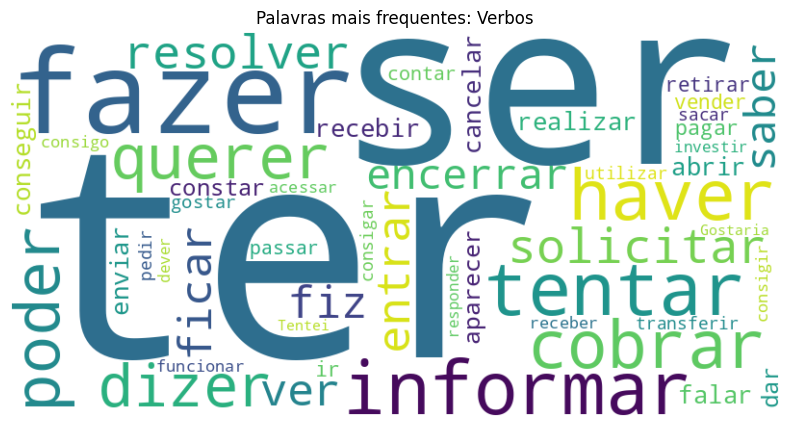

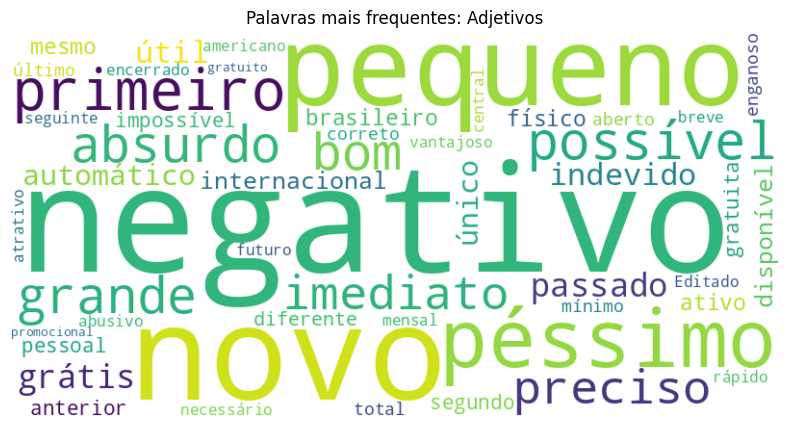

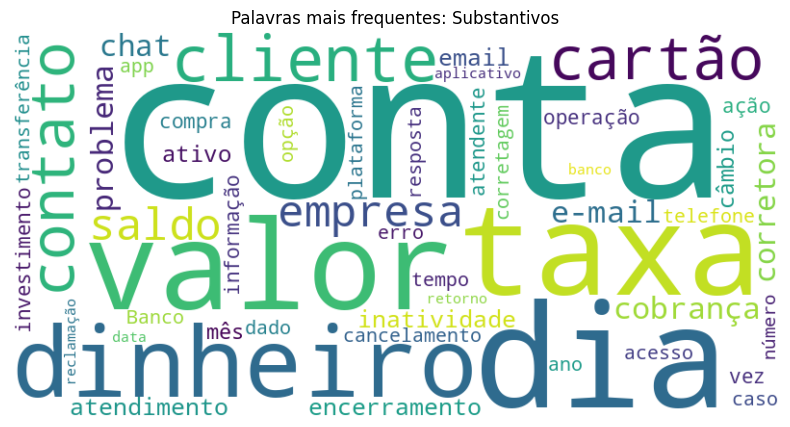

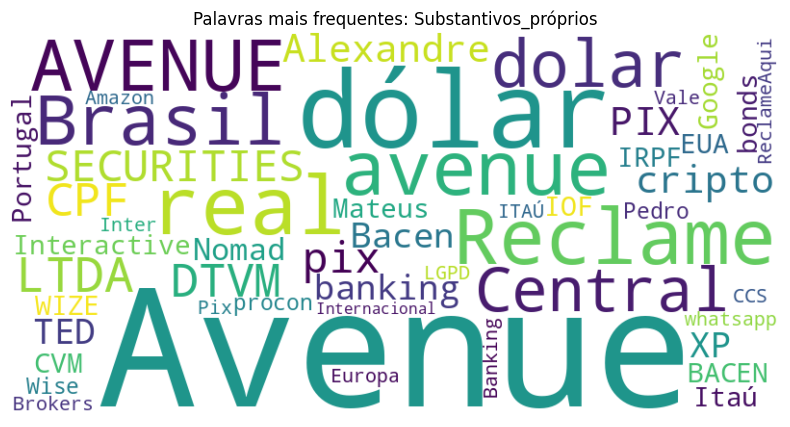

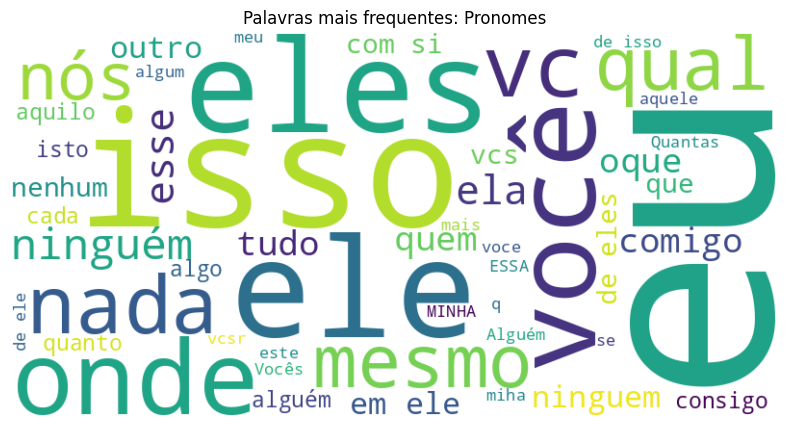

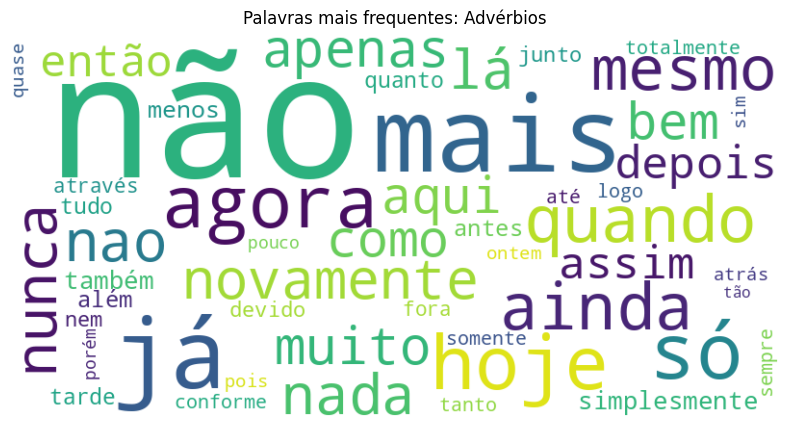

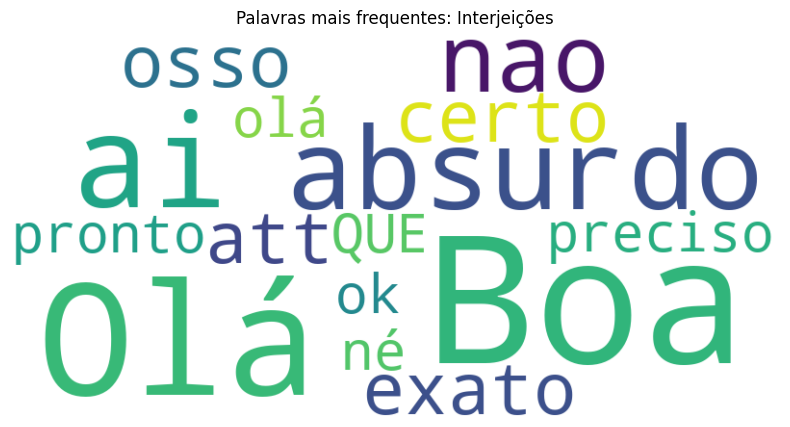

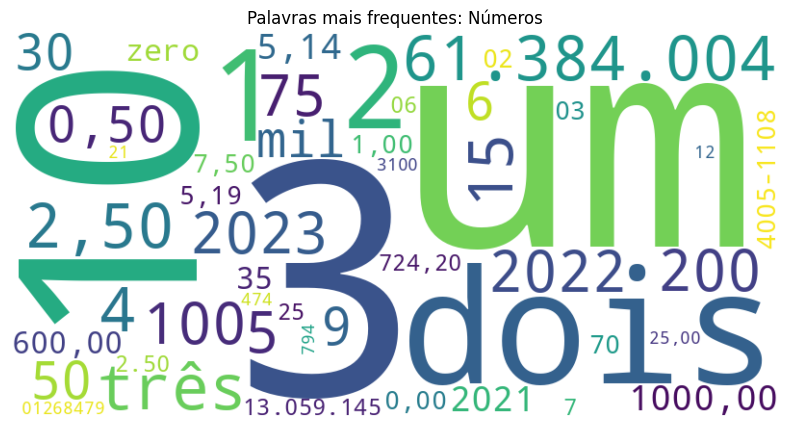

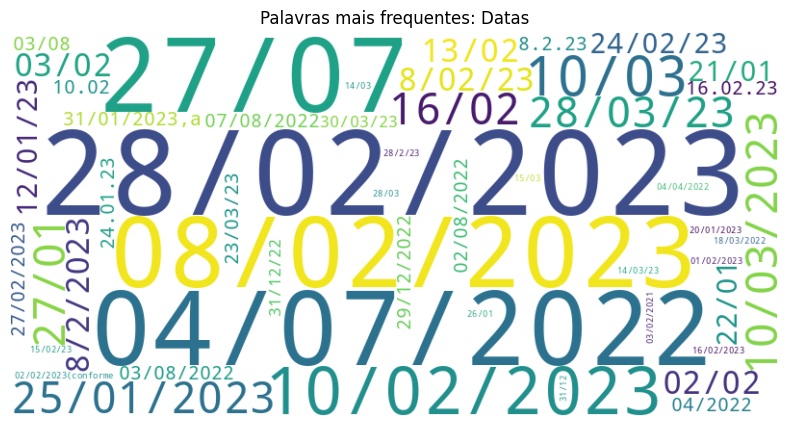

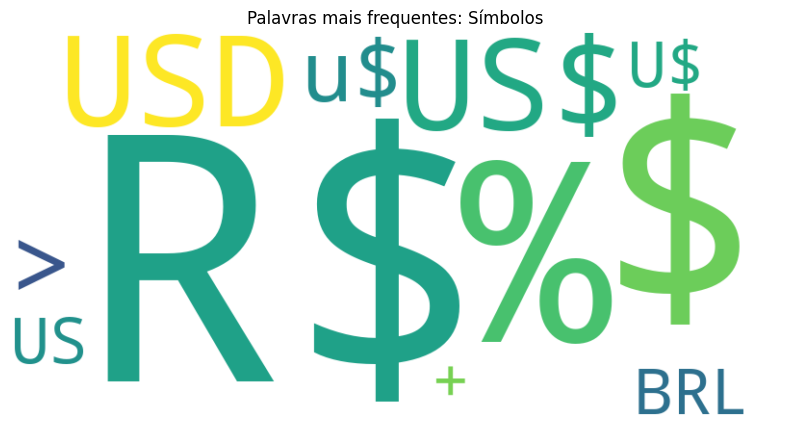

In [ ]:
for classe_gramatical, df in dfs.items():
    # Filtering only the top 50 most frequent words
    top_words = df.nlargest(50, 'frequência')

    # Converting the DataFrame into a frequency dictionary
    freq_dict = top_words['frequência'].to_dict()

    # Generating and displaying the word cloud for the part of speech
    generate_wordcloud(freq_dict, f'Palavras mais frequentes: {classe_gramatical.capitalize()}')

## # Conducting topic classification with data visualization

In [ ]:
# Simply removing some annoying warning messages

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from gensim import corpora, models
from gensim.utils import simple_preprocess

# Loading data from the titles of the comments
data = tabela_final['Título']

# Loading the spaCy language model for Portuguese
nlp = spacy.load('pt_core_news_sm')

def preprocess(text):
    doc = nlp(text.lower()) # Converting everything to lowercase to avoid topic repetition due to writing style
    # Excluding words that may hinder rather than help the analysis
    words_to_remove = ['avenue', 'empresa', 'consigo', 'nao', 'dia', 'cliente', 'recebi']
    # Removing stopwords, conjunctions, articles, prepositions, adjectives, adverbs, and non-alphabetic characters
    tokens = [token.text for token in doc if not token.is_stop and token.pos_ not in ('ADP', 'CCONJ', 'DET', 'ADV', 'ADJ') and token.is_alpha and token.text not in words_to_remove]
    return tokens

# Data preprocessing
tokenized_data = [preprocess(doc) for doc in data]

# Creating a dictionary from the tokenized data
dictionary = corpora.Dictionary(tokenized_data)

# Converting documents into a corpus using the dictionary
corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]

# Training the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Displaying the main topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.042*"cobrança" + 0.038*"aviso" + 0.030*"resolver" + 0.023*"atendimento" + 0.023*"cartão"')
(1, '0.067*"taxa" + 0.065*"cobrança" + 0.046*"inatividade" + 0.039*"dinheiro" + 0.029*"atendimento"')
(2, '0.069*"conta" + 0.037*"cancelamento" + 0.030*"transferência" + 0.023*"retirada" + 0.023*"sacar"')
(3, '0.178*"conta" + 0.048*"encerramento" + 0.038*"registrato" + 0.035*"dinheiro" + 0.027*"saldo"')
(4, '0.097*"conta" + 0.040*"cancelar" + 0.034*"cartão" + 0.027*"encerrar" + 0.021*"taxas"')


In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Creating a variable with pre-processed data
pre_processed_text = tabela_final['Título'].apply(preprocess)

# Preparing the data for visualization
corpus = [dictionary.doc2bow(text) for text in pre_processed_text]
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Visualizing topics and keywords
pyLDAvis.display(lda_vis)

In [ ]:
# Function to obtain the dominant topic

def get_dominant_topic(text, lda_model, dictionary):
    bow = dictionary.doc2bow(text)
    topic_scores = lda_model.get_document_topics(bow)
    dominant_topic = max(topic_scores, key=lambda x: x[1])[0]
    return dominant_topic

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Function to obtain the most representative keyword of a topic

def get_topic_keyword(lda_model, topic_id):
    words_probs = lda_model.show_topic(topic_id)
    main_keyword = words_probs[0][0]  # The most representative keyword is the first in the list
    return main_keyword

# Obtaining keywords from dominant topics
dominant_topic_keywords = [get_topic_keyword(lda_model, get_dominant_topic(text, lda_model, dictionary)) for text in pre_processed_text]

# Adding dominant topics to the original data
tabela_final['Tópicos_dominantes'] = dominant_topic_keywords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Saving the DataFrame to my Google Drive

e_isso_ai = "/content/drive/MyDrive/tabela_final_com_topicos.csv"
tabela_final.to_csv(e_isso_ai, index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## # Checking for patterns or trends by combining the two analyses

The idea is to analyze the frequency of each topic's keywords in relation to parts of speech

In [ ]:
def get_manual_grammatical_class(token_text):
    if token_text in verbos:
        return 'verbos'
    elif token_text in adjetivos:
        return 'adjetivos'
    elif token_text in substantivos:
        return 'substantivos'
    elif token_text in substantivos_próprios:
        return 'substantivos próprios'
    elif token_text in pronomes:
        return 'pronomes'
    elif token_text in advérbios:
        return 'advérbios'
    elif token_text in interjeições:
        return 'interjeições'
    elif token_text in números:
        return 'números'
    elif token_text in datas:
        return 'datas'
    elif token_text in símbolos:
        return 'símbolos'
    else:
        return None

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Initializing the frequency dictionary (dominant topic, part of speech)
topic_grammatical_freq = {}

for _, row in tabela_final.iterrows():
    topic = row['Tópicos_dominantes']
    text = row['Conteúdo_Comentário']
    doc = nlp(text)

    for token in doc:
        grammatical_class = get_manual_grammatical_class(token.text)

        if grammatical_class:
            pair = (topic, grammatical_class)
            if pair not in topic_grammatical_freq:
                topic_grammatical_freq[pair] = 1
            else:
                topic_grammatical_freq[pair] += 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


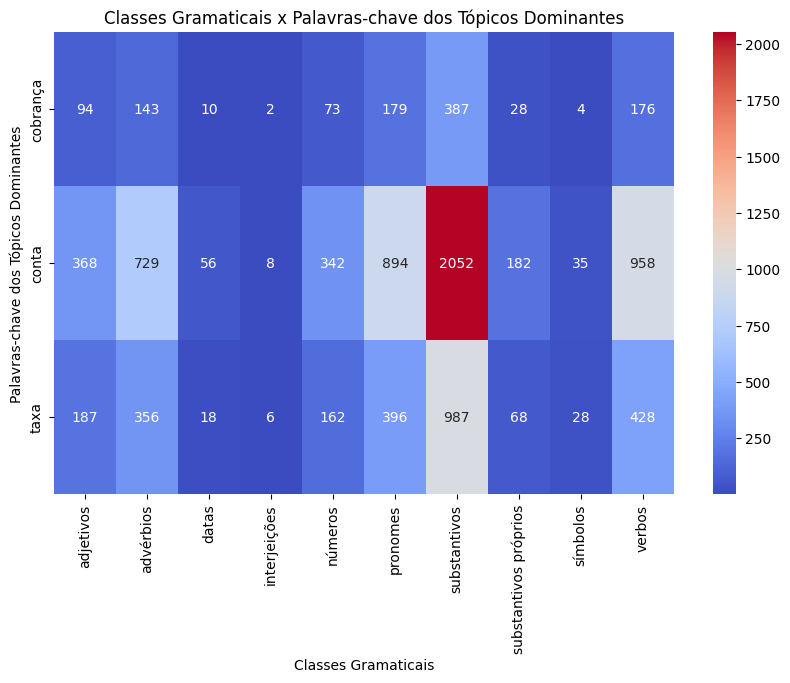

In [ ]:
import seaborn as sns

# Obtaining unique keywords and parts of speech from the frequency dictionary
unique_keywords = sorted(set(keyword for keyword, _ in topic_grammatical_freq.keys()))
unique_grammatical_classes = sorted(set(grammatical_class for _, grammatical_class in topic_grammatical_freq.keys()))

# Creating an empty DataFrame with keywords as index and parts of speech as columns
heatmap_df = pd.DataFrame(index=unique_keywords, columns=unique_grammatical_classes)

# Filling the DataFrame with frequencies from the dictionary
for keyword in unique_keywords:
    for grammatical_class in unique_grammatical_classes:
        heatmap_df.loc[keyword, grammatical_class] = topic_grammatical_freq.get((keyword, grammatical_class), 0)

# Converting the DataFrame to float
heatmap_df = heatmap_df.astype(float)

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.0f')

plt.title('Classes Gramaticais x Palavras-chave dos Tópicos Dominantes')
plt.xlabel('Classes Gramaticais')
plt.ylabel('Palavras-chave dos Tópicos Dominantes')

plt.show()